In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RL.csv'
fr = pd.read_csv(FILE)

V = np.array(fr['VR (mV)'])* 10**-3
t = np.array(fr['t(us)']) * 10**-6
R = 996 # 10%
R_L = 58.5 # resistenza interna all'induttanza
sigmaR = 0.1 * R
T = 0.05 # s
L = 0.082 # Hr
sigmaV = 0.2 /np.sqrt(12)
Vg = 1.984 # V

In [6]:
def VR(t, τ,Vg):
    # τ = L/(R)
    return Vg*(1- 2*np.exp(-t/τ)/(1+np.exp(-T/(2*τ))))

i = Interpolazione(t,V,VR,sigmaV,p0=[L/R,Vg])
print(i)

   
Parameters: [8.42516516e-05 1.81763556e+00] 
Sigma parameters: [2.80459959e-07 4.64093692e-03]

sigmaY: 0.05773502691896258

chiquadro ridotto: 0.12
df: 53
pvalue: 100.0%
covariance matrix: [[7.30412322e-14 4.93304787e-10]
 [4.93304787e-10 2.00003544e-05]]    



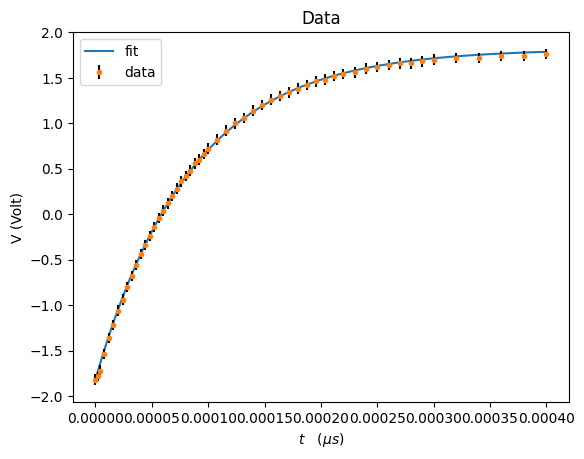

In [15]:
plt.plot(i.x_best,i.y_best,label='fit')
plt.errorbar(t, V, yerr=sigmaV, ecolor='black', fmt='.', label='data')

# x = np.linspace(min(t),max(t),1000) 
# y = VR(x,L/R,i.bval[1])
# plt.plot(x,y,label='valori attesi')

plt.xlabel('$t \quad (\mu s)$')
plt.ylabel('V (Volt)')
plt.legend()
plt.title('Data')
plt.show()